# Customising Colorbars

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

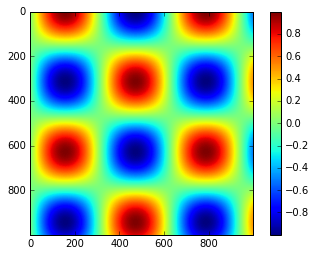

In [2]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();


## Customising Colorbars

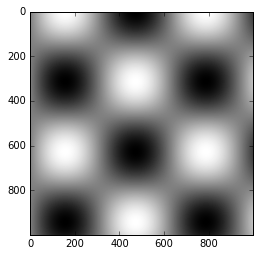

In [8]:
plt.imshow(I, cmap='gray');

We can view them by looking at:

In [ ]:
plt.cm.<TAB>

## Choosing the Colormap

There is a big decision the be made regarding colormap. View http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833 and http://matplotlib.org/1.4.1/users/colormaps.html for a discussion

Broadly there are three different categories of colormaps:
- Sequential colormaps: there are made up of continuous sequence of colours (eg binary or viridis) <br>
- Divergent colormaps: there usually contain two distinct colours, which show positive and negative deviations from a mean (e.g. RdBu or Pu0r)
- Qualitative colourmaps: these mix two colours with no particular sequence (e.g. rainbow or jet)

The jet map, which used to be the default, is an example of qualitative colourmap. Problematically they do not usually display any uniform progression in brightness. We can convert the jet colorbar into black and white:

In [11]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

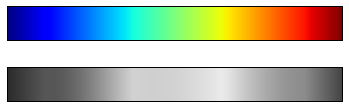

In [12]:
view_colormap('jet')

The uneven brightness means the eye will be drawn to certain portions of the datarange, which potentially emphasise unimportant regions. It's better to use viridis.

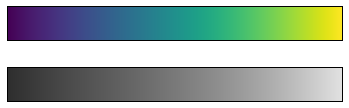

In [13]:
view_colormap('viridis')

Another good option for continuous data is the cubehelix colormap:

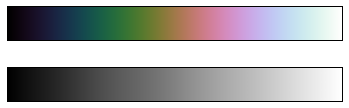

In [14]:
view_colormap('cubehelix')

For some situations, showing positive and negative deviations from some mean, dual-color colourbars such as RdBu can be useful. However, it's important to rememver the positive-negative will be lost on the grayscale:

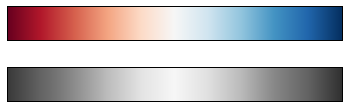

In [15]:
view_colormap('RdBu')

## Color limits and extensions

The colorbar is simply an instance of plt.Axes, so all the axes and tick formatting things we've seen apply. We can narrow the color limits, and indicate out-of-bounds values with a triangular arrow by setting the extend property. This can come in handy when there is noise:

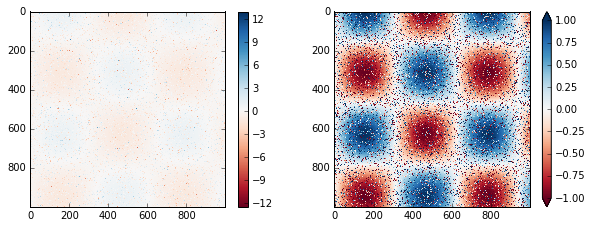

In [26]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) <0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);


The default colour limits respond to the noisy pixels, and the range of the noise washes out the other pattern. Thus setting limits, and adding extensions indicates values above and below the limits.

## Discrete Color Bars

Easiest way to do this is using plt.cm.get_cmap(), and pass the name of a suitable colourmap along with number of bins

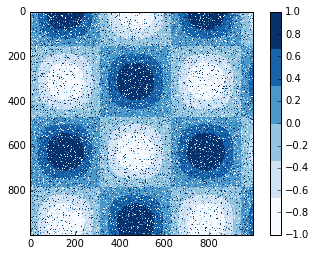

In [31]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

## Example: Handwritten Digits

There's a dataset in Scikit-Learn with 2,000 8x8 thumbnails with various handwritten digits.

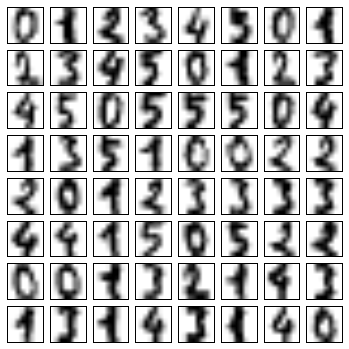

In [37]:
# load images of digits 0 through 5 and visualise some of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Each digit is defined by the hue of its 64 pixels, so can think of each digit to be point lying in 64-dimensional space: each dimension represents the brightness of one pixel. Visualising this can be difficult: can use dimensionality reduction such as manifold laerning to reduce the dimensionality. Discuss this later in What is Machine Learning?

Lets look at two-dimensional manifold learning projection:

In [38]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

/Users/maxcrolla1/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


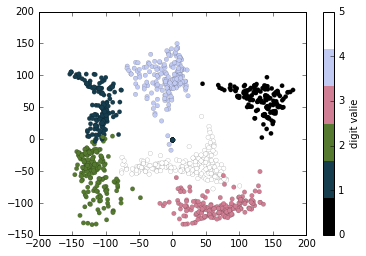

In [41]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit valie')
plt.clim=(-0.5, 5.5)